   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000  

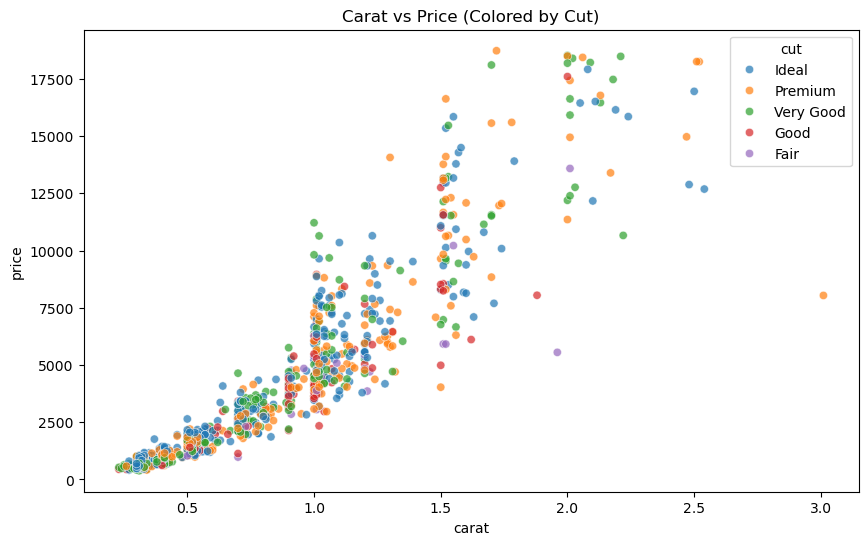

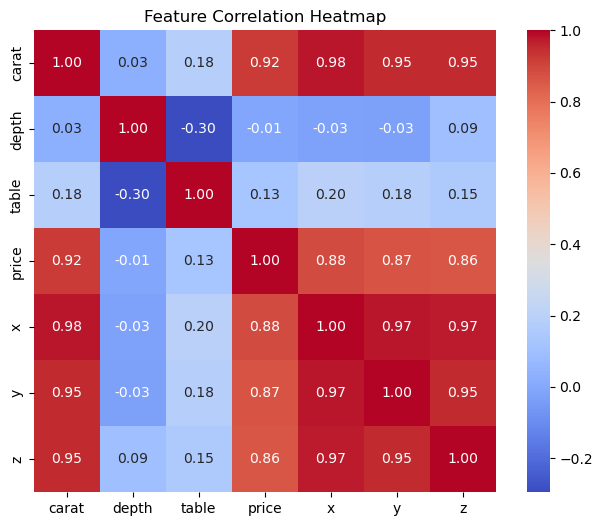

Linear Regression MSE: 1825912.99
Linear Regression R-squared: 0.89
Decision Tree R² Score: 0.9666
KNN Model Trained Successfully


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
diamonds = sns.load_dataset('diamonds')
print(diamonds.head())
print(diamonds.describe())

# Scatterplot: Carat vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="carat", y="price", hue="cut", data=diamonds.sample(1000, random_state=1), alpha=0.7)
plt.title("Carat vs Price (Colored by Cut)")
plt.show()

# Feature correlation heatmap
numeric_df = diamonds.select_dtypes(include='number')
corrmat = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    le = LabelEncoder()
    diamonds[col] = le.fit_transform(diamonds[col])
    label_encoders[col] = le

# Split dataset
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Linear Regression R-squared: {r2_score(y_test, y_pred):.2f}")

# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f"Decision Tree R² Score: {tree.score(X_test, y_test):.4f}")

# K-Nearest Neighbors Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("KNN Model Trained Successfully")

# Support Vector Classifier
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

# Random Forest Classification (Predicting Cut)
X_cut = diamonds.drop(columns=['cut', 'price'])
y_cut = diamonds['cut']
X_cut_train, X_cut_test, y_cut_train, y_cut_test = train_test_split(X_cut, y_cut, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_cut_train, y_cut_train)
y_cut_pred = rf.predict(X_cut_test)
cm = confusion_matrix(y_cut_test, y_cut_pred, labels=rf.classes_)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix - Diamonds Dataset')
plt.show()

# Predicting new diamond price
new_diamond = pd.DataFrame([{
    'carat': 0.5,
    'cut': label_encoders['cut'].transform(['Ideal'])[0],
    'color': label_encoders['color'].transform(['G'])[0],
    'clarity': label_encoders['clarity'].transform(['SI1'])[0],
    'depth': 61.5,
    'table': 55.0,
    'x': 4.0,
    'y': 4.1,
    'z': 2.5
}])
predicted_price = lin_reg.predict(new_diamond)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")